In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

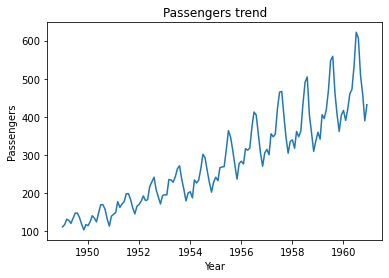

In [43]:
data = pd.read_csv("AirPassengers.csv", 
                   index_col="Month", 
                   parse_dates=True, 
                   )

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(data["#Passengers"])

ax1.set_title("Passengers trend")
ax1.set_xlabel("Year")
ax1.set_ylabel("Passengers")

plt.show()

/opt/conda/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


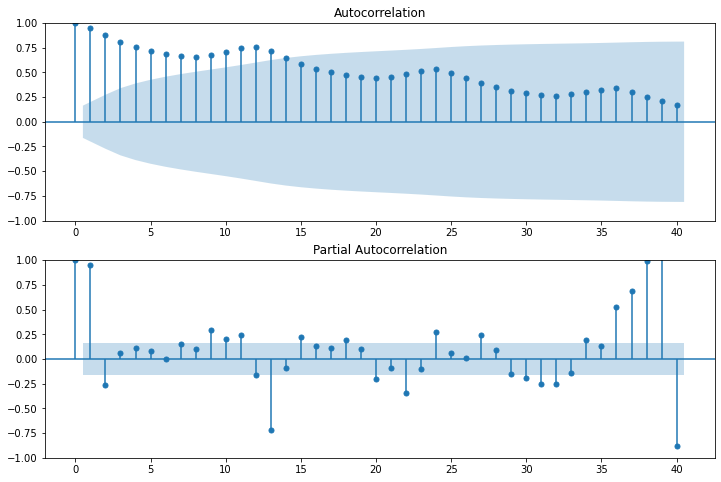

In [72]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data, lags=40, ax=ax2)

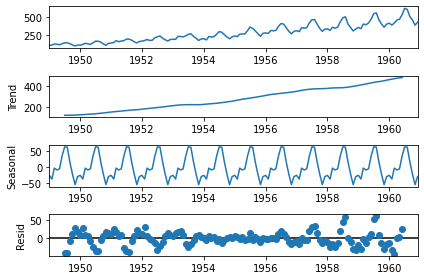

In [76]:
seasonal_decompose_res = sm.tsa.seasonal_decompose(data)
_ = seasonal_decompose_res.plot()

In [61]:
ser = data["#Passengers"]
for i in range(2): #0次と1次の和分過程で探索
    delta_y = np.diff(ser, n=i)
    resdiff = sm.tsa.arma_order_select_ic(
        delta_y, 
        ic="aic", 
        trend="n", 
    )
    print(resdiff)

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'aic':              0            1            2
0  2057.847338  1870.304420  1815.455278
1  1429.818499  1412.972509  1413.093177
2  1417.449554  1410.568929  1411.134649
3  1412.528591  1411.318625  1409.209306
4  1411.130361  1411.859020  1408.850646, 'aic_min_order': (4, 2)}


/opt/conda/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


{'aic':              0            1            2
0  1413.909117  1397.257792  1397.093436
1  1401.852641  1394.683204  1385.496795
2  1396.587654  1378.338025  1353.345800
3  1395.021214  1379.614000  1377.086541
4  1388.216680  1384.054248  1373.560615, 'aic_min_order': (2, 2)}


In [107]:
ser.iloc[-30:]

491

In [114]:
ser[:pd.Timestamp(1957, 12, 31)]

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1957-08-01    467
1957-09-01    404
1957-10-01    347
1957-11-01    305
1957-12-01    336
Name: #Passengers, Length: 108, dtype: int64

In [117]:
data_2 = np.log10(ser)
train = np.log10(ser[:pd.Timestamp(1957, 12, 31)])
res = sm.tsa.ARIMA(train, order=(2,1,2)).fit() #{"fopt":1e-9})

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


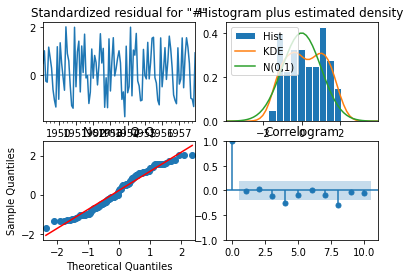

In [119]:
_ = res.plot_diagnostics()

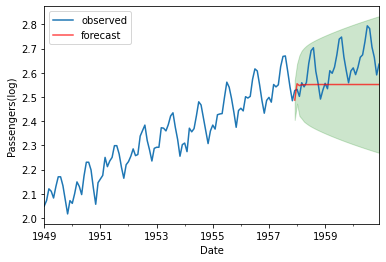

In [124]:
pred = res.get_prediction(start=pd.to_datetime("1957-12-01"),
                              end = pd.to_datetime("1960-12-01"),
                              dynamic=False)

# 期待値と信頼区間を取り出す
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha = .05)

# グラフの描画
data_2["1949-01-01":].plot(label="observed")
pred_mean.plot(label="forecast", alpha=.7, color = "r")
 
# 信頼区間の描画
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.2)
 
plt.xlabel("Date")
plt.ylabel("Passengers(log)")
plt.legend()

In [ ]:
model_final = SARIMAX(,
              order = min_aic[0],
              seasonal_order=min_aic, 
              enforce_stationarity=True,
              enforce_invertibility=True)
 
results = model_final.fit()
 
print(results.summary())

# SARIMA

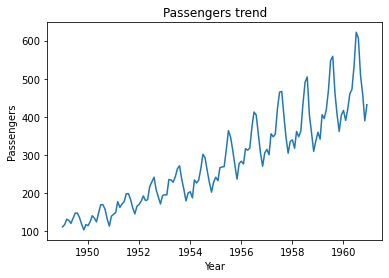

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("AirPassengers.csv", 
                   index_col="Month", 
                   parse_dates=True, 
                   dtype="float")

fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(data["#Passengers"])

ax1.set_title("Passengers trend")
ax1.set_xlabel("Year")
ax1.set_ylabel("Passengers")

plt.show()

In [190]:
model_final = sm.tsa.SARIMAX(train,
              order = [1,1,1],
              seasonal_order=[1,0,1,12], 
              enforce_stationarity=True,
              enforce_invertibility=True)
 
results = model_final.fit()
 
print(results.summary())

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09191D+00    |proj g|=  7.96131D+00

At iterate    5    f= -1.70269D+00    |proj g|=  1.01189D+00

At iterate   10    f= -1.70405D+00    |proj g|=  2.74191D-01

At iterate   15    f= -1.70494D+00    |proj g|=  2.79930D-03

At iterate   20    f= -1.70496D+00    |proj g|=  1.49043D-01

At iterate   25    f= -1.70848D+00    |proj g|=  2.14953D+00

At iterate   30    f= -1.71862D+00    |proj g|=  4.31742D-01

At iterate   35    f= -1.71974D+00    |proj g|=  1.79805D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

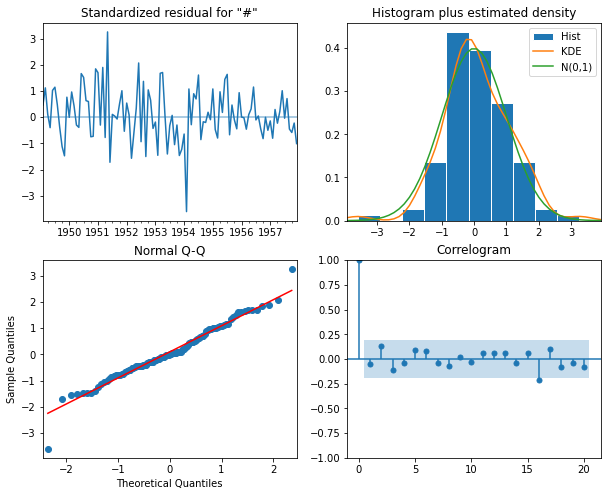

In [193]:
_ = results.plot_diagnostics(figsize=(10,8), lags=20)

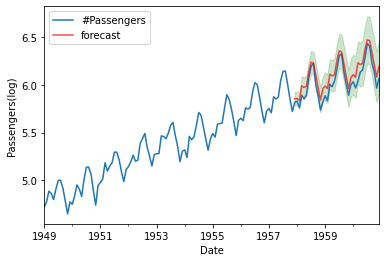

In [194]:
pred = results.get_prediction(start=pd.to_datetime("1957-12-01"),
                              end = pd.to_datetime("1960-12-01"),
                              dynamic=False)

# 期待値と信頼区間を取り出す
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int(alpha = .05)

# グラフの描画
data_2["1949-01-01":].plot(label="observed")
pred_mean.plot(label="forecast", alpha=.7, color = "r")
 
# 信頼区間の描画
plt.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='g', alpha=.2)
 
plt.xlabel("Date")
plt.ylabel("Passengers(log)")
plt.legend()

# ARIMA usage
https://www.nbshare.io/notebook/136553745/Time-Series-Analysis-Using-ARIMA-From-StatsModels/

In [134]:
df=pd.read_csv('perrin-freres-monthly-champagne.csv')

In [135]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [136]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [137]:
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [138]:
df.drop(106,axis=0,inplace=True)

In [139]:
df.tail()

,Month,Sales
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN


In [140]:
df.drop(105,axis=0,inplace=True)

In [141]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [143]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month',inplace=True)

In [144]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

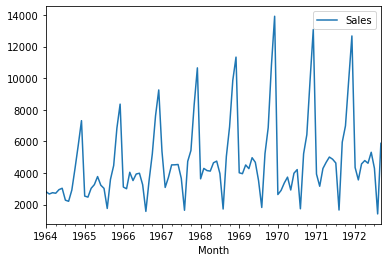

In [145]:
df.plot()

In [146]:
from statsmodels.tsa.stattools import adfuller

In [147]:
test_result=adfuller(df['Sales'])

In [149]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary ")

In [150]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276215
p-value : 0.36391577166024586
#Lags Used : 11
Number of Observations Used : 93
Weak evidence against null hypothesis that means time series has a unit root which indicates that it is non-stationary 


In [157]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [159]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
P value is less than 0.05 that means we can reject the null hypothesis(Ho). Therefore we can conclude that data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

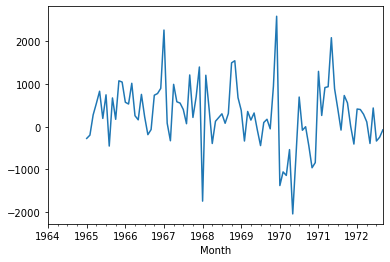

In [160]:
df['Seasonal First Difference'].plot()

In [170]:
import statsmodels.api as sm

In [166]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

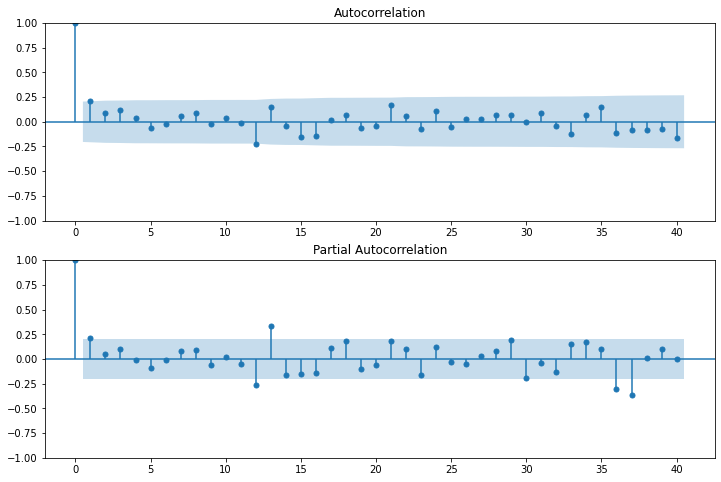

In [163]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [172]:
model= sm.tsa.ARIMA(df['Sales'],order=(1,1,1))
model_fit=model.fit()

In [173]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  105
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -952.814
Date:                Sun, 10 Jul 2022   AIC                           1911.627
Time:                        06:52:27   BIC                           1919.560
Sample:                    01-01-1964   HQIC                          1914.841
                         - 09-01-1972                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4545      0.114      4.001      0.000       0.232       0.677
ma.L1         -0.9667      0.056    -17.329      0.000      -1.076      -0.857
sigma2      5.226e+06   6.17e+05      8.472      0.000    4.02e+06    6.44e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 2.59
Prob(Q):                              0.34   Prob(JB):                         0.27
Heteroskedasticity (H):               3.40   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

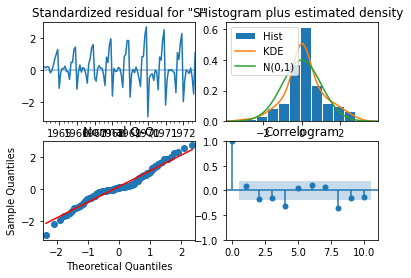

In [175]:
_ = model_fit.plot_diagnostics()

<AxesSubplot:xlabel='Month'>

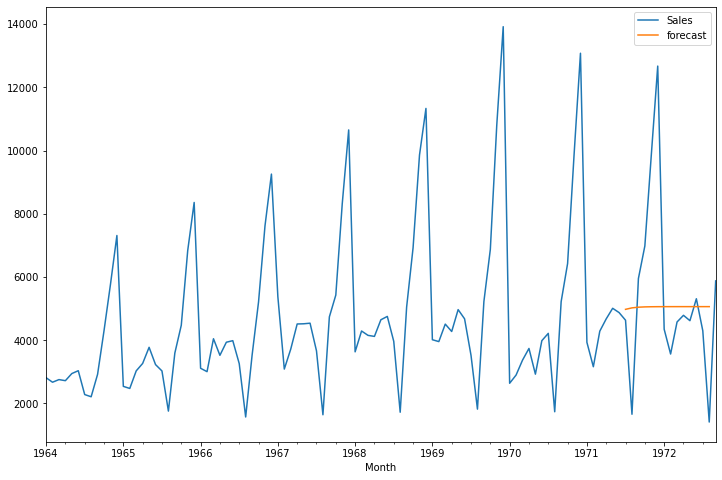

In [176]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [178]:
model=sm.tsa.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.07295D+00    |proj g|=  4.80911D-02

At iterate    5    f=  7.04942D+00    |proj g|=  1.53381D-02

At iterate   10    f=  7.04713D+00    |proj g|=  2.99452D-04


 This problem is unconstrained.



At iterate   15    f=  7.04708D+00    |proj g|=  5.05919D-03

At iterate   20    f=  7.04413D+00    |proj g|=  1.18439D-02

At iterate   25    f=  7.03252D+00    |proj g|=  1.06014D-03

At iterate   30    f=  7.03240D+00    |proj g|=  5.94924D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     34      1     0     0   1.534D-05   7.032D+00
  F =   7.0324006467381812     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [179]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Sun, 10 Jul 2022   AIC                           1486.804
Time:                                    06:54:08   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

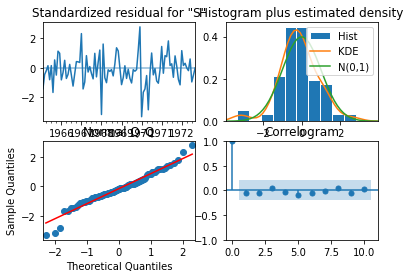

In [181]:
_ = results.plot_diagnostics()

<AxesSubplot:xlabel='Month'>

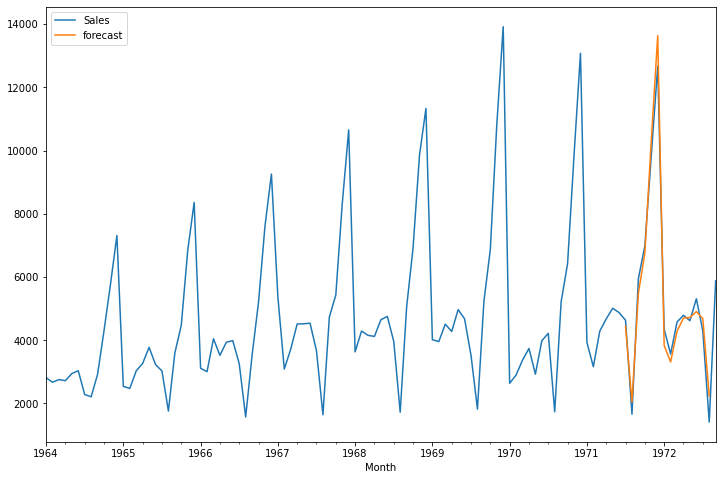

In [182]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [183]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,60)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [185]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

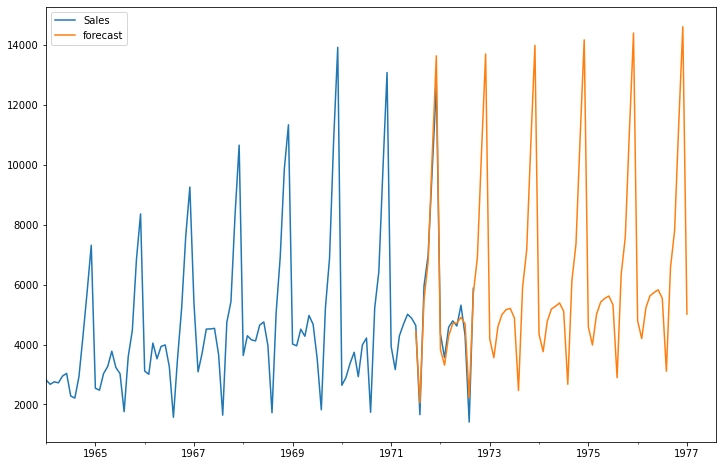

In [187]:
future_df['forecast'] = results.predict(start = 90, end = 156, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 